In [175]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [186]:
# Charger le dataframe du dataset des travaux engagés à Lyon
df_travaux = pd.read_csv("data_travaux/travaux-engages-metropole-lyon.csv", sep=";")

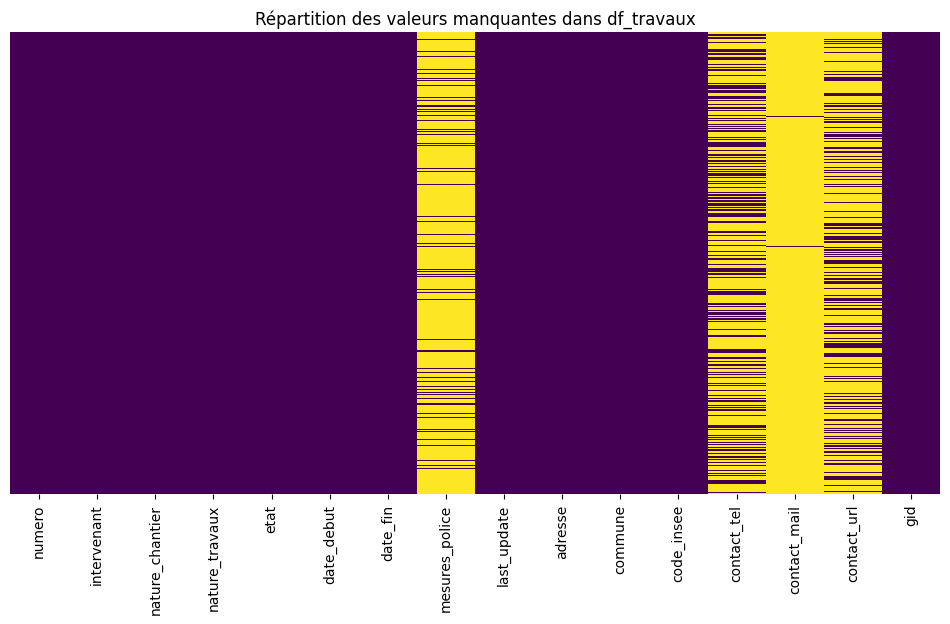

In [177]:
# Visualisation des valeurs manquantes dans df_travaux
plt.figure(figsize=(12, 6))
sns.heatmap(df_travaux.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Répartition des valeurs manquantes dans df_travaux')
plt.show()

In [178]:
cols_travaux_a_supprimer = ['mesures_police', 'contact_tel', 'contact_mail', 'contact_url'] # Trop de NaN dans les colonnes
df_travaux = df_travaux.drop(columns=cols_travaux_a_supprimer, errors='ignore')

In [ ]:
print("--- Valeurs manquantes dans df_travaux ---")
print(df_travaux.isnull().sum())

# Supprime les lignes où 'date_debut' est NaN
df_travaux = df_travaux.dropna(subset=['date_debut'])

--- Valeurs manquantes dans df_travaux ---
numero             0
intervenant        0
nature_chantier    0
nature_travaux     0
etat               0
date_debut         3
date_fin           0
last_update        0
adresse            0
commune            0
code_insee         0
gid                0
dtype: int64


In [185]:
# df_travaux prétraité 
df_travaux

,numero,intervenant,nature_chantier,nature_travaux,etat,date_debut,date_fin,last_update,adresse,commune,code_insee,gid
0,202206858,LYON - Direction De La Construction,Travaux sur une parcelle en limite d'espace pu...,Renfort chaussée en vue de la pose d'une grue,Ouvert,2024-06-03,2028-12-31,2025-02-07 09:02:15.051362+01:00,"10 rue Neyret, 69001 Rue des Tables Claudienn...",Lyon 1er,69381,183025
1,202512731,ORANGE SA,"Branchements réseau < 25 ml TELECOM, RMT ET VIDEO","Intervention sur des chambres, boites, armoire...",Validé,2025-12-24,2026-01-07,2025-12-16 15:02:03.127680+01:00,Face au 10 Route du Bruissin (Francheville),Francheville,69089,199942
2,202512882,DCE / RT / Rive Gauche,Émergences et autres équipements d'assainissement,Remise à niveau / entretien des tampons et éme...,Validé,2025-12-15,2026-01-16,2025-12-04 12:02:37.539147+01:00,"Avenue d'Oschatz, de Rue Gaston Monmousseau a...",Venissieux,69259,199946
3,202512887,ORANGE SA,"Branchements réseau < 25 ml TELECOM, RMT ET VIDEO",Réparation de branchement < 25 ml (télécom ou ...,Validé,2025-12-12,2026-01-19,2025-12-04 12:02:38.122193+01:00,à côté 3 Chemin de Chantegrillet (Francheville),Francheville,69089,199947
4,202513013,DCE / RT / Rive Droite Sud,"Construction, renouvellement et réparation rés...",Réparation de canalisation d'assainissement,Validé,2025-12-08,2025-12-19,2025-12-04 12:02:38.969904+01:00,35 Rue Pierre Dupont (Lyon 1er Arrondissement),Lyon 1er,69381,199954
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,202512873,RCU Centre Métropole - ELM (Dalkia),"Construction, renouvellement et réparation rés...",Construction de réseau sans branchement (Chauf...,Validé,2025-12-02,2025-12-24,2025-12-16 15:02:03.235650+01:00,"Du 16 Rue du 8 Mai 1945, au 104 Place du 8 Mai...",Saint Priest,69290,199822
1315,202301053,AOMTL (SYTRAL Mobilités),Aménagement pour les transports en commun,Création / aménagement de voie Bus / Tram,Ouvert,2023-02-07,2026-08-31,2023-02-07 18:07:40.672980+01:00,- Rue Rue Florian (Villeurbanne) : De Avenue A...,Villeurbanne,69266,135907
1316,202301060,AOMTL (SYTRAL Mobilités),Aménagement pour les transports en commun,Création / aménagement de voie Bus / Tram,Ouvert,2023-01-23,2026-08-31,2023-02-07 18:07:10.246549+01:00,Tracé T6N du carrefour Zola/Verlaine Bourgey a...,Villeurbanne,69266,135939
1317,202301064,AOMTL (SYTRAL Mobilités),Aménagement pour les transports en commun,Création / aménagement de voie Bus / Tram,Ouvert,2023-01-23,2026-08-31,2023-02-07 18:07:31.539607+01:00,Traversée futur Parc - Usine ACI Villeurbanne ...,Villeurbanne,69266,135921


In [187]:
df_flux = pd.read_csv("data_flux/mesures-comptage-metropole-lyon.csv", sep=';')


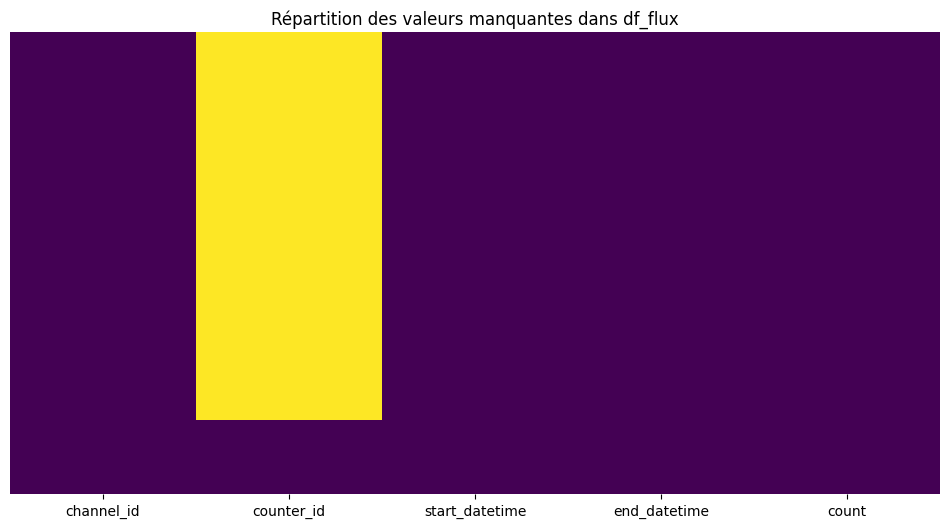

In [181]:
# Visualisation des valeurs manquantes dans df_flux
plt.figure(figsize=(12, 6))
sns.heatmap(df_flux.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Répartition des valeurs manquantes dans df_flux')
plt.show()

In [ ]:
# Suppression de la colonne 'counter_id' 
df_flux = df_flux.drop(columns="counter_id", errors='ignore')
df_flux


,channel_id,start_datetime,end_datetime,count
0,100029813,2023-04-06 01:00:00+02:00,2023-04-06 02:00:00+02:00,0
1,100029813,2023-04-06 00:00:00+02:00,2023-04-06 01:00:00+02:00,0
2,100029813,2023-04-05 23:00:00+02:00,2023-04-06 00:00:00+02:00,0
3,100029813,2023-04-05 22:00:00+02:00,2023-04-05 23:00:00+02:00,1
4,100029813,2023-04-05 21:00:00+02:00,2023-04-05 22:00:00+02:00,0
...,...,...,...,...
995,101017787,2023-04-05 14:00:00+02:00,2023-04-05 15:00:00+02:00,1
996,101017787,2023-04-05 13:00:00+02:00,2023-04-05 14:00:00+02:00,1
997,101017787,2023-04-05 12:00:00+02:00,2023-04-05 13:00:00+02:00,1
998,101017787,2023-04-05 11:00:00+02:00,2023-04-05 12:00:00+02:00,0
